# TP SVM classification
Diane Lingrand (diane.lingrand@univ-cotedazur)

Université Nice Côte d'Azur 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

## dataset: Iris

In [2]:
# loading the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
print("train: ", y_train)
print("test: ", y_test)

train:  [0 0 1 0 2 1 1 1 2 2 2 0 1 0 2 1 0 0 2 1 0 2 1 0 0 1 1 1 2 0 1 0 2 1 0 1 0
 2 2 2 2 0 1 2 0 1 1 0 1 0 1 1 2 2 2 0 1 1 2 1 0 2 0 0 0 2 0 0 1 1 2 0 0 2
 1 2 0 0 0 1 0 1 1 2 1 0 0 2 0 1]
test:  [2 0 0 2 1 2 0 0 2 2 0 0 2 0 1 2 2 1 0 2 1 0 1 1 2 2 0 0 1 2 1 1 1 1 1 2 2
 1 2 1 2 2 0 2 2 0 2 1 0 0 1 2 1 1 1 2 2 0 2 2]


### classification of only 2 classes

In [5]:
# we choose to remove class with label 2 (Iris Virginica)
X_trainBinaire = X_train[y_train!=2]
y_trainBinaire = y_train[y_train!=2]
X_testBinaire = X_test[y_test!=2]
y_testBinaire = y_test[y_test!=2]


In [6]:
# verification that we have binary labels for only 2 classes
print("train: ", y_trainBinaire)
print("test: ", y_testBinaire)

train:  [0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1]
test:  [0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0]


In [7]:
#default constructor
mySvcBin = svm.SVC(kernel='linear')
#learning
time_start = time.perf_counter()
mySvcBin.fit(X_trainBinaire,y_trainBinaire)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 0.00 seconds


F1 score :  1.0


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


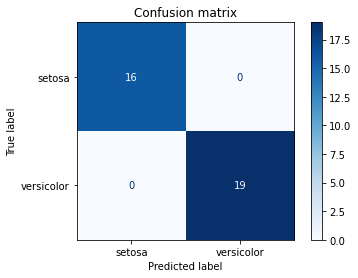

In [8]:
#test performances
y_predBinaire = mySvcBin.predict(X_testBinaire)

disp = plot_confusion_matrix(mySvcBin, X_testBinaire, y_testBinaire,
                                 display_labels=list(iris.target_names)[0:2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaire,y_testBinaire))

### classification of all classes

In [9]:
#default constructor
mySvc = svm.SVC(kernel='linear', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

learning done in 0.00 seconds


F1 score :  [1.         0.97297297 0.98039216]


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


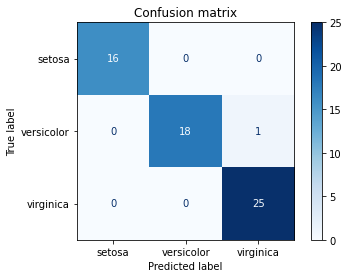

In [10]:
#test performances
y_pred = mySvc.predict(X_test)

disp = plot_confusion_matrix(mySvc, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average=None))

### My trials

Can we do it better? Try other kernels, other hyper-parameters (C, ...)

In [11]:
#default constructor
mySvc_1 = svm.SVC(kernel='sigmoid', C=3,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
mySvc_1.fit(X_train,y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))
# </div><i class="fa fa-lightbulb-o "></i>

learning done in 0.00 seconds


F1 score :  [0.42105263 0.         0.        ]


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


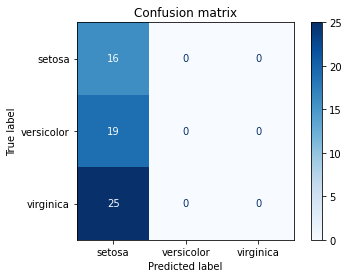

In [12]:
#test performances
y_pred1 = mySvc_1.predict(X_test)

disp = plot_confusion_matrix(mySvc_1, X_test, y_test,
                                 display_labels=list(iris.target_names),
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred1,y_test,average=None))

## dataset: MNIST

In [13]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score

In [14]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

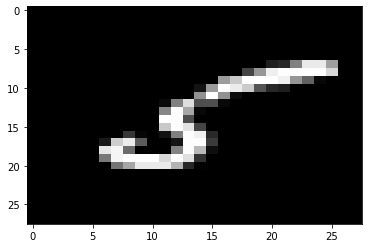

5


In [15]:
#display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt
i = 11 #index of the image: change it in order to display other images
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print(y_train[i])

In [16]:
# case of binary classification: we choose coats and bags

# you can change the classes
class1 = 4 #negative class 'coats'
class2 = 8 #positive class 'bags'
nameClass1 = '4'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2)
mesClassesTest = (y_test==class1)|(y_test==class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain,:])
y_trainBinaire = np.array((y_train[mesClassesTrain]-class1)/(class2-class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]-class1)/(class2-class1))

In [17]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n,-1)
#test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n,-1)

In [19]:
#default constructor
## your job is to build a SVC classifier
mySvc_2 = svm.SVC(kernel='linear', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
## your job is to train your SVC classifier 
mySvc_2.fit(x_trainBinaireLin,y_trainBinaire)

time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 2.59 seconds


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score :  0.991223541559112


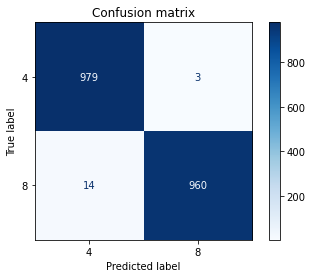

In [20]:
y_predBinaireTest = mySvc_2.predict(x_testBinaireLin)## compute the prediction of x_testBinaireLin using your learned classifier

disp = plot_confusion_matrix(mySvc_2, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

Same question as for the Iris dataset: can you improve the results by tuning hyper-parameters or changing the kernel ?

In [21]:
#default constructor
## your job is to build a SVC classifier
mySvc_3 = svm.SVC(kernel='rbf', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
## your job is to train your SVC classifier 
mySvc_3.fit(x_trainBinaireLin,y_trainBinaire)

time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 4.00 seconds


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score :  0.9984575835475578


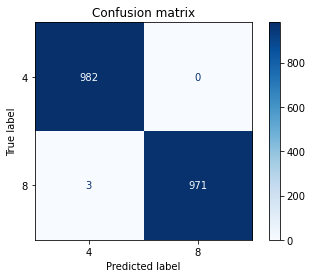

In [22]:
y_predBinaireTest = mySvc_3.predict(x_testBinaireLin)## compute the prediction of x_testBinaireLin using your learned classifier

disp = plot_confusion_matrix(mySvc_3, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

## The whole dataset with the 10 classes

In [23]:
# your turn!
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [24]:
#default constructor
### your job is ....
mysvc = svm.SVC(kernel='linear', C=1)#,decision_function_shape='ovr')
#learning
time_start = time.perf_counter()
### your job is ...
mysvc.fit(x_trainLin, y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 240.40 seconds


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score :  [0.96423174 0.97905759 0.9311507  0.9216545  0.94768612 0.90734463
 0.95337873 0.94146581 0.91832461 0.93084301]


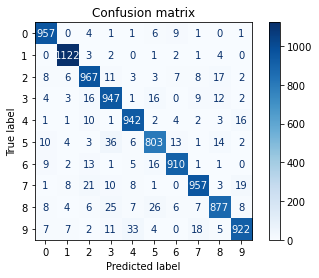

In [25]:
y_predTest = mysvc.predict(x_testLin) ##theNameOfYourClassifier.predict(x_testLin)

disp = plot_confusion_matrix(mysvc, x_testLin, y_test, ##theNameOfYourClassifier, x_testLin, y_test,
                                 display_labels=['0','1','2','3','4','5','6', '7', '8', '9'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predTest,y_test, average=None))

In [26]:
# from sklearn.model_selection import GridSearchCV
# paramGrid = [
# {'C':[0.1, 0.2, 0.5, 1, 2, 5, 10], 'kernel':['linear']},
# {'C':[0.5, 1, 5, 10],'degree':[2,3],'coef0':[-1,0,1],'kernel':['poly']}
# ]
# searchBestParams = GridSearchCV(svm.SVC(), paramGrid, scoring='precision_macro')
# searchBestParams.fit(x_trainLin, y_train)
# #searchBestParams
# means = searchBestParams.cv_results_['mean_test_score']
# stds = searchBestParams.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, searchBestParams.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# print()

In [27]:
# using the best set of parameters, learn the SVM classifier (whole train set)
# C = 
# kernel = ''

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [1]:
# your turn!
# Load Fashion MINIST dataset
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train.shape, y_train.shape, X_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

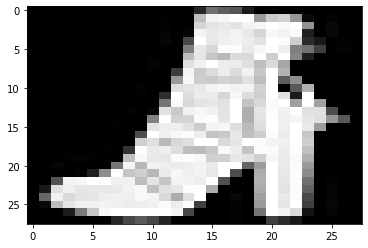

9


In [4]:
#display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt
i = 11 #index of the image: change it in order to display other images
plt.imshow(X_train[i],aspect="auto",cmap='gray')
plt.show()
print(y_train[i])

In [7]:
# case of binary classification: we choose coats and bags

# you can change the classes
class1 = 4 #negative class 'coats'
class2 = 8 #positive class 'bags'
nameClass1 = '4'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2)
mesClassesTest = (y_test==class1)|(y_test==class2)

## TRAIN
X_trainBinaire = np.array(X_train[mesClassesTrain,:])
y_trainBinaire = np.array((y_train[mesClassesTrain]-class1)/(class2-class1))

## TEST
X_testBinaire = np.array(X_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]-class1)/(class2-class1))

In [9]:
X_trainBinaire.shape

(12000, 28, 28)

In [10]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = X_trainBinaire.shape[0]
X_trainBinaireLin = X_trainBinaire.reshape(n,-1)
#test
n = X_testBinaire.shape[0]
X_testBinaireLin = X_testBinaire.reshape(n,-1)

In [11]:
#default constructor
## your job is to build a SVC classifier
mySvc_3 = svm.SVC(kernel='linear', C=4,decision_function_shape='ovo')
#learning
time_start = time.perf_counter()
## your job is to train your SVC classifier 
mySvc_3.fit(X_trainBinaireLin,y_trainBinaire)

time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 5.69 seconds


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score :  0.9839839839839841


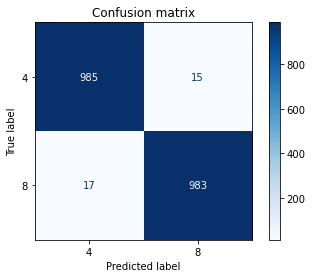

In [12]:
y_predBinaireTest = mySvc_3.predict(X_testBinaireLin)## compute the prediction of x_testBinaire

disp = plot_confusion_matrix(mySvc_3, X_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

In [13]:
# your turn!
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = X_train.shape[0]
X_trainLin = X_train.reshape(n,-1)
#test
n = X_test.shape[0]
X_testLin = X_test.reshape(n,-1)

In [15]:
#default constructor
### your job is ....
mysvc4 = svm.SVC(kernel='linear', C=1)#,decision_function_shape='ovr')
#learning
time_start = time.perf_counter()
### your job is ...
mysvc4.fit(X_trainLin, y_train)
time_elapsed = (time.perf_counter()-time_start)
print("learning done in %.2f seconds" %(time_elapsed))

learning done in 497.91 seconds


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score :  [0.78177458 0.96683417 0.75171065 0.84665661 0.7693837  0.93366584
 0.5943945  0.92704715 0.93718338 0.94831912]


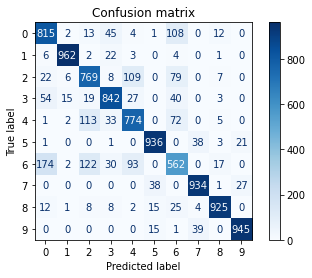

In [16]:
y_predTest = mysvc4.predict(X_testLin) ##theNameOfYourClassifier.predict(x_testLin)

disp = plot_confusion_matrix(mysvc4, X_testLin, y_test, ##theNameOfYourClassifier, x_testLin, y_test,
                                 display_labels=['0','1','2','3','4','5','6', '7', '8', '9'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predTest,y_test, average=None))

## Active learning with SVM

In [76]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import cv2
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [78]:
def hog_feature_extractor(hog_extractor, im):
    
    descriptor = hog_extractor.compute(im)
    
    return descriptor
# Hog Parameters
winSize = (28,28)
blockSize = (14,14)
blockStride = (7,7)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
useSignedGradients = True
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, useSignedGradients)

In [79]:
def show_sample(x,y,i):
    print("Label: {}".format(y[i]))
    plt.imshow(x[i], cmap="gray");

In [80]:
df_x = trainX
df_y = trainY

In [81]:
#Lets see our labels
nclasses = set(df_y)
print(nclasses)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [82]:
# what percentage of data is used initially
percentage = 1
selected_indices = []
for c in nclasses:
    
    indices_c = list(np.where(df_y == c))[0]
    len_c = len(list(np.where(df_y == c))[0])
    len_c_subset = int(len_c * percentage / 100)
    
    df_c_subset = random.sample(list(indices_c), len_c_subset)
    selected_indices += df_c_subset
    
    print("There are '{}' images for class label '{}' and selected only '{}' for active learning.".format(len_c, c, len_c_subset))
    print("----")
    
df_subset_x = df_x[selected_indices]
df_subset_y = df_y[selected_indices]

There are '5923' images for class label '0' and selected only '59' for active learning.
----
There are '6742' images for class label '1' and selected only '67' for active learning.
----
There are '5958' images for class label '2' and selected only '59' for active learning.
----
There are '6131' images for class label '3' and selected only '61' for active learning.
----
There are '5842' images for class label '4' and selected only '58' for active learning.
----
There are '5421' images for class label '5' and selected only '54' for active learning.
----
There are '5918' images for class label '6' and selected only '59' for active learning.
----
There are '6265' images for class label '7' and selected only '62' for active learning.
----
There are '5851' images for class label '8' and selected only '58' for active learning.
----
There are '5949' images for class label '9' and selected only '59' for active learning.
----


In [83]:
print("Subset {}, {}".format(df_subset_x.shape, df_subset_y.shape))

Subset (596, 28, 28), (596,)


In [84]:
#the remaning set
df_remainder_x = np.delete(df_x, selected_indices, axis=0)
df_remainder_y = np.delete(df_y, selected_indices, axis=0)
print("Remainder {}, {}".format(df_remainder_x.shape, df_remainder_y.shape))

Remainder (59404, 28, 28), (59404,)


In [85]:
# Feature Extraction
df_subset_x_hog = []
for elem in df_subset_x:
    df_subset_x_hog.append(hog_feature_extractor(hog, elem).reshape(-1))
df_remainder_x_hog = []
for elem in df_remainder_x:
    df_remainder_x_hog.append(hog_feature_extractor(hog, elem).reshape(-1))
df_subset_y_hog = list(df_subset_y.copy())
df_remainder_y_hog = list(df_remainder_y.copy())

In [91]:
for iteration in range(10):
    
    clf=svm.LinearSVC()
    clf.fit(df_subset_x_hog, df_subset_y_hog)
    
    res = clf._predict_proba_lr(df_remainder_x_hog)
    
    # Params for unlabeled samples
    threshold = 0.75 - (iteration * 0.05)
    del_indices = []
    for sample_counter in range(len(res)):
        
        if res[sample_counter][np.argmax(res[sample_counter])] > threshold:
            predicted_label = np.argmax(res[sample_counter])
            df_subset_x_hog.append(list(df_remainder_x_hog[sample_counter]))
            df_subset_y_hog.append(df_remainder_y_hog[sample_counter])
            del_indices.append(sample_counter)
    
    df_remainder_x_hog = [i for j, i in enumerate(df_remainder_x_hog) if j not in del_indices]
    df_remainder_y_hog = [i for j, i in enumerate(df_remainder_y_hog) if j not in del_indices]
    
    print("Iteration: {} has done...".format(iteration))

Iteration: 0 has done...
Iteration: 1 has done...
Iteration: 2 has done...
Iteration: 3 has done...
Iteration: 4 has done...
Iteration: 5 has done...
Iteration: 6 has done...
Iteration: 7 has done...
Iteration: 8 has done...
Iteration: 9 has done...


Start with few annoted data and iterate by asking new labelled data and re-learn SVM separation. Try different selection of new labelled data.

## Reduction of the dataset

Suffle and divide the train dataset by 2 multiple time. For each division, learn a SVM classifier and test the performances.

## Classification of images

Represent the images using a deep CNN and perform the classification using SVM. 